# Datasets e DataLoaders no Pytorch

Demonstração do funcionamento dos Datasets e Dataloaders no Pytorch

### Objetivo

O objetivo deste notebook é demonstrar as três formas de carregar e usar dados no PyTorch:

* torch.utils.data.TensorDataset
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

Neste notebook usaremos o dataset de Flores Íris, já visto anteriormente

In [221]:
#Importar as bibliotes

import numpy as np
import torch
from torch.utils.data import TensorDataset

from torchvision import transforms

from sklearn.datasets import load_iris

# Datasets

No Pytorch, datasets são objetos utilizados para armazenar, indexar, transformar e retornar elementos de um conjunto de dados.

Existem duas formas de se criar um dataset em PyTorch:

* Transformar os dados de entrada em tensores torch e criar o dataset com torch.utils.data.TensorDataset¶
* Criar uma classe filha de torch.utils.data.Dataset

## Criando um Dataset com `torch.utils.data.TensorDataset`

Se os dados e as classes forem disponibilizados em arrays do numpy ou tensores do próprio PyTorch é possível criar um dataset utilizando [torch.utils.data.TensorDataset](http://pytorch.org/docs/master/data.html#torch.utils.data.TensorDataset):

### Dados anotados: x_data (comprimento das sépalas) e target (comprimento das pétalas)  

In [222]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_data = data[:,0:1]
target = data[:,1:2]

print('dimensões de x_data:', x_data.shape)
print('dimensões de target:', target.shape)

dimensões de x_data: (50, 1)
dimensões de target: (50, 1)


In [223]:
data

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1]])

### Passo 1: transformar o array numpy em tensores torch

In [224]:
#Transformar dados em Tensores

x_data = torch.FloatTensor(x_data)
target = torch.FloatTensor(target)

### Passo 2: usar `TensorDataset` para criar o dataset com os tensores

In [225]:
dataset = TensorDataset(x_data, target)
len(dataset)

50

O dataset pode ser indexado como uma lista e cada elemento retorna uma tupla:
- dado de entrada e
- dado de saída.

In [226]:
#Valores originais
data[0]

array([7. , 4.7])

In [227]:
#Valores no objeto dataset do pytorch
dataset[0]

(tensor([7.]), tensor([4.7000]))

In [228]:
i = 10
(x, y) = dataset[i]

print('sépala:', x)
print('pétala:', y)

sépala: tensor([5.])
pétala: tensor([3.5000])


## Criando um Dataset com `torch.utils.data.Dataset`

É possível criar uma nova classe personalizada representando um dataset. Esta classe deve herdar de [torch.utils.data.Dataset](http://pytorch.org/docs/master/data.html#torch.utils.data.Dataset) para tratar casos mais complexos e especiais.

### Estrutura do Dataset

Sempre que se herda de `Dataset` é preciso implementar os métodos:
- `__len__`: para retornar o tamanho do dataset, e
- `__getitem__`: para retornar um elemento de um índice dado.

O método `__len__` é chamado quando usamos a chamada `len(dataset)` do Python e `__getitem__` é chamado quando fazemos a indexação `dataset[i]`.

É possível inicializar variáveis da classe no construtor (`__init__`) do dataset.

In [229]:
#Criaçaõ de classe personalizada Dataset

from torch.utils.data import Dataset

class IrisDataset(Dataset):
    def __init__(self, x_data, target):
        super(IrisDataset, self).__init__()

        self.data = x_data
        self.target = target

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):

        sepala = self.data[index]
        petala = self.target[index]

        return (sepala, petala)

Nossa classe está pronta, podemos criar um objeto dela.

### Criando e testando um objeto da nossa classe

Para exemplificar o uso de classes de transformação os dados foram novamente gerados como array numpy.

In [230]:
x = data[:,0:1]
y = data[:,1:2]

dataset = IrisDataset(x, y)

Nosso método `__len__` deve retornar o tamanho da primeira dimensão dos dados.

Podemos verificar se o método está correto chamando o `len()` do Python:

In [231]:
len(dataset)

50

Nosso método `__getitem__()` deve retornar uma tupla na i-ésima posição no dataset, no nosso caso `data[i]` e `target[i]`:

In [232]:
i = 1
print(dataset[i])

(array([6.4]), array([4.5]))


In [233]:
data, target = dataset[1]

print('sépala:', data)
print('pétala:', target)

sépala: [6.4]
pétala: [4.5]


### Conclusão

O caso apresentado neste tópico é muito simples, apresentando os conceitos básicos da estrutura que o Pytorch utiliza para representar datasets. A classe torch.utils.data.Dataset é usada para casos complexos em que é preciso, por exemplo, carregar o dataset de arquivos e quando o gerenciamento dos dados não é tão trivial ou quando queremos aplicar uma transformação ao dado.

# DataLoaders

Um DataLoader ([torch.utils.data.DataLoader](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)) combina um Dataset e um Sampler (divide os dados em batches).

O DataLoader permite que os dados possam ser processados na forma de "mini-batches". A cada nova chamada do objeto criado com o DataLoader, um novo conjunto de dados é retornado. O DataLoader é a ferramenta do PyTorch para implementar o treinamento do gradiente descendente por "mini-batches". O treinamento por mini-batches possui duas grandes vantagens:
- Implementa o gradiente descendente estocástico via mini-batch, que acelera o treinamento;
- Permite que os dados do mini-batch a serem otimizados caibam na memória (normalmente da GPU).


## Criando um DataLoader

Vamos utilizar o dataset já criado anteriormente para ser a fonte de dados do nosso DataLoader.

In [234]:
print('tamanho do dataset: ', len(dataset))
print('amostra 12:', dataset[12])

tamanho do dataset:  50
amostra 12: (array([6.]), array([4.]))


Agora podemos criar o DataLoader com o dataset

In [235]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset,
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=False) # se for True, embaralha os dados no inicio de cada iteração

## Iterando sobre o DataLoader

Podemos iterar sobre o DataLoader utilizando um `for`

In [236]:
batch_n = 0
n_samples = 0
for data in data_loader:
    print('batch ', batch_n)
    batch_n += 1
    n_samples += len(data[0])

print('tamanho do DataLoader', len(data_loader))
print('tamanho do dataset', n_samples)

batch  0
batch  1
batch  2
batch  3
batch  4
tamanho do DataLoader 5
tamanho do dataset 50


O tamanho do DataLoader é 5, pois temos batches de tamanho 10 dados no dataloader.

Agora podemos utilizar os dados do DataLoader:

In [237]:
batch_n = 0

for data in data_loader:
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    print('dimensão do batch de sépalas {}:   {}'.format(batch_n, data_batch.size()))
    print('dimensão do batch de pétalas {}: {}\n'.format(batch_n, targets_batch.size()))
    batch_n += 1


dimensão do batch de sépalas 0:   torch.Size([10, 1])
dimensão do batch de pétalas 0: torch.Size([10, 1])

dimensão do batch de sépalas 1:   torch.Size([10, 1])
dimensão do batch de pétalas 1: torch.Size([10, 1])

dimensão do batch de sépalas 2:   torch.Size([10, 1])
dimensão do batch de pétalas 2: torch.Size([10, 1])

dimensão do batch de sépalas 3:   torch.Size([10, 1])
dimensão do batch de pétalas 3: torch.Size([10, 1])

dimensão do batch de sépalas 4:   torch.Size([10, 1])
dimensão do batch de pétalas 4: torch.Size([10, 1])



In [238]:
#Visualização dos dados em cada batch

for data in data_loader:

  print('X')
  print(data_batch)
  print()
  print('target')
  print(targets_batch)

X
tensor([[5.5000],
        [6.1000],
        [5.8000],
        [5.0000],
        [5.6000],
        [5.7000],
        [5.7000],
        [6.2000],
        [5.1000],
        [5.7000]], dtype=torch.float64)

target
tensor([[4.4000],
        [4.6000],
        [4.0000],
        [3.3000],
        [4.2000],
        [4.2000],
        [4.2000],
        [4.3000],
        [3.0000],
        [4.1000]], dtype=torch.float64)
X
tensor([[5.5000],
        [6.1000],
        [5.8000],
        [5.0000],
        [5.6000],
        [5.7000],
        [5.7000],
        [6.2000],
        [5.1000],
        [5.7000]], dtype=torch.float64)

target
tensor([[4.4000],
        [4.6000],
        [4.0000],
        [3.3000],
        [4.2000],
        [4.2000],
        [4.2000],
        [4.3000],
        [3.0000],
        [4.1000]], dtype=torch.float64)
X
tensor([[5.5000],
        [6.1000],
        [5.8000],
        [5.0000],
        [5.6000],
        [5.7000],
        [5.7000],
        [6.2000],
        [5.1000],
        

É possível ver que os batches tem mesmo 10 dados (5 matrizes 10x1 para as sépalas e 5 matrizes 10x1 para as pétalas)

No exemplo abaixo é possível ver que, com shuffle igual o False, os dados de cada mini-batch são sempre os mesmos. Cada cor contém os dados de um mini-batch:

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt

In [240]:
data_loader = DataLoader(dataset,
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=False) # se for True, embaralha os dados no inicio de cada iteração

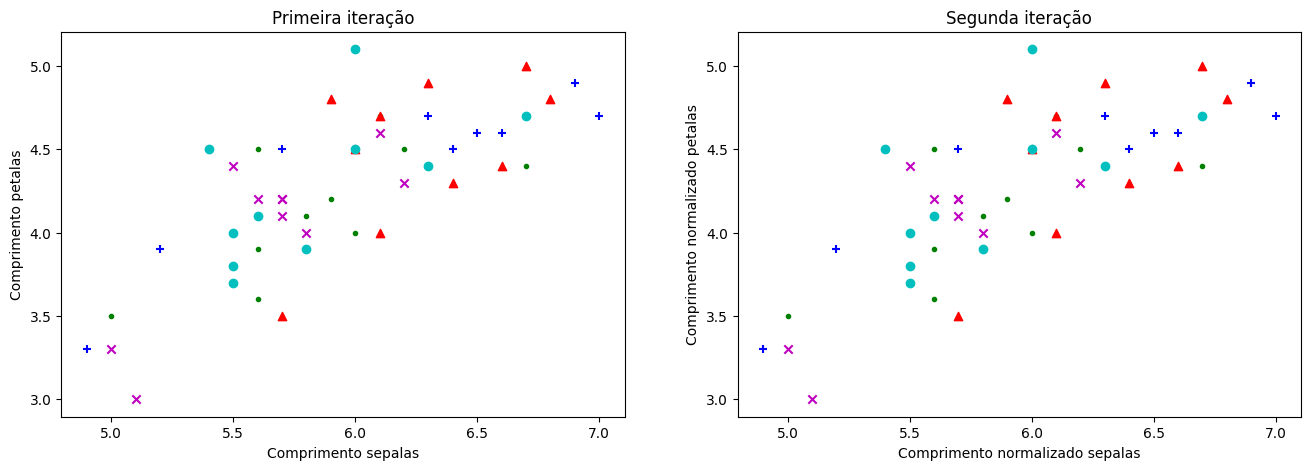

In [241]:
color = ["b","g","r","c","m"]
mark = ['+', '.', '^', 'o', 'x']
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Comprimento sepalas')
ax1.set_ylabel('Comprimento petalas')
ax1.set_title('Primeira iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax1.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Comprimento normalizado sepalas')
ax2.set_ylabel('Comprimento normalizado petalas')
ax2.set_title('Segunda iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax2.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])


Com shuffle igual a True, os dados do mini-batch sempre mudam a cada iteração:

In [242]:
data_loader = DataLoader(dataset,
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=True)  # se for True, embaralha os dados no inicio de cada iteração

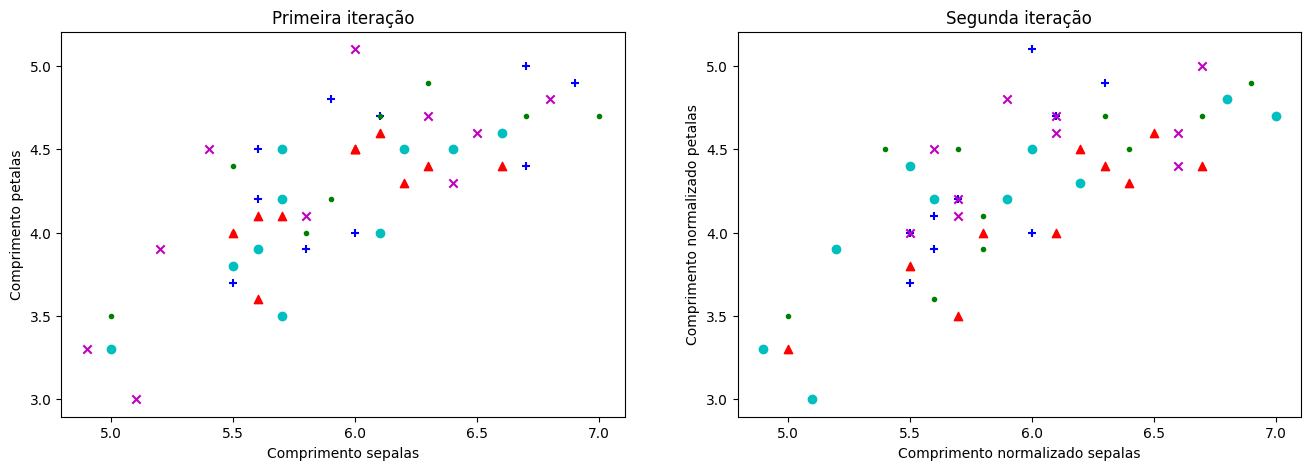

In [243]:
color = ["b","g","r","c","m"]
mark = ['+', '.', '^', 'o', 'x']
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Comprimento sepalas')
ax1.set_ylabel('Comprimento petalas')
ax1.set_title('Primeira iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax1.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Comprimento normalizado sepalas')
ax2.set_ylabel('Comprimento normalizado petalas')
ax2.set_title('Segunda iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax2.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])

## Exercício

Defina seu próprio DataLoader na segunda célula abaixo. Faça com que
cada batch tenha 5 elementos cada. Utilize o dataset já criado
anteriormente.
Em seguida imprima o tamanho do Dataloader e tamanho do Dataset


In [244]:
# --- DataLoader com batches de 5 elementos cada ---
data_loader = DataLoader(batch_size=5,
                         dataset=dataset,
                         shuffle=False)

batch_n = 0
n_samples = 0
for data in data_loader:
    print('batch ', batch_n)
    batch_n += 1
    n_samples += len(data[0])

print('tamanho do DataLoader', len(data_loader))
print('tamanho do dataset', n_samples)

batch  0
batch  1
batch  2
batch  3
batch  4
batch  5
batch  6
batch  7
batch  8
batch  9
tamanho do DataLoader 10
tamanho do dataset 50


In [245]:
#Valores de cada batch

for data in data_loader:
  print(data_batch, targets_batch)

tensor([[5.6000],
        [5.9000],
        [5.7000],
        [5.5000],
        [6.6000],
        [5.7000],
        [6.7000],
        [6.6000],
        [6.1000],
        [6.1000]], dtype=torch.float64) tensor([[4.5000],
        [4.8000],
        [4.2000],
        [4.0000],
        [4.4000],
        [4.1000],
        [5.0000],
        [4.6000],
        [4.7000],
        [4.6000]], dtype=torch.float64)
tensor([[5.6000],
        [5.9000],
        [5.7000],
        [5.5000],
        [6.6000],
        [5.7000],
        [6.7000],
        [6.6000],
        [6.1000],
        [6.1000]], dtype=torch.float64) tensor([[4.5000],
        [4.8000],
        [4.2000],
        [4.0000],
        [4.4000],
        [4.1000],
        [5.0000],
        [4.6000],
        [4.7000],
        [4.6000]], dtype=torch.float64)
tensor([[5.6000],
        [5.9000],
        [5.7000],
        [5.5000],
        [6.6000],
        [5.7000],
        [6.7000],
        [6.6000],
        [6.1000],
        [6.1000]], dtype=torch

- A ordem dos elementos se altera entre execuções da célula acima? **Não, a ordem dos elementos do batch se mantém a mesma após cada execução pois o Shuffle foi setado como False**
- Tente colocar o parametro `shuffle` do DataLoader como `True` e obsreve o resultado do exercício, rodando várias vezes. **Ao listar Shuffle como True, os elementos do batch mudam após cada iteração, conforme código abaixo**

In [247]:
# -- Defina aqui seu DataLoader com batches de 5 elementos cada ---
data_loader2 = DataLoader(batch_size=5,
                         dataset=dataset,
                         shuffle=True)

batch_n = 0
n_samples = 0
for data in data_loader2:
    data_batch, targets_batch = data
    print('batch ', batch_n)
    batch_n += 1
    n_samples += len(data[0])
    print(data_batch, targets_batch)
print('tamanho do DataLoader', len(data_loader2))
print('tamanho do dataset', n_samples)



batch  0
tensor([[5.6000],
        [5.8000],
        [6.0000],
        [5.5000],
        [5.9000]], dtype=torch.float64) tensor([[4.5000],
        [3.9000],
        [4.5000],
        [4.0000],
        [4.8000]], dtype=torch.float64)
batch  1
tensor([[6.6000],
        [5.1000],
        [5.9000],
        [7.0000],
        [5.7000]], dtype=torch.float64) tensor([[4.4000],
        [3.0000],
        [4.2000],
        [4.7000],
        [3.5000]], dtype=torch.float64)
batch  2
tensor([[5.7000],
        [6.7000],
        [5.4000],
        [6.3000],
        [5.8000]], dtype=torch.float64) tensor([[4.5000],
        [5.0000],
        [4.5000],
        [4.9000],
        [4.1000]], dtype=torch.float64)
batch  3
tensor([[6.6000],
        [6.2000],
        [6.1000],
        [6.5000],
        [5.6000]], dtype=torch.float64) tensor([[4.6000],
        [4.5000],
        [4.7000],
        [4.6000],
        [3.9000]], dtype=torch.float64)
batch  4
tensor([[5.7000],
        [5.7000],
        [6.1000],
     

In [248]:
#Rodando novamente o código para criação do Data_Loader
# -- Defina aqui seu DataLoader com batches de 5 elementos cada ---
data_loader2 = DataLoader(batch_size=5,
                         dataset=dataset,
                         shuffle=True)

batch_n = 0
n_samples = 0
for data in data_loader2:
    data_batch, targets_batch = data
    print('batch ', batch_n)
    batch_n += 1
    n_samples += len(data[0])
    print(data_batch, targets_batch)
print('tamanho do DataLoader', len(data_loader2))
print('tamanho do dataset', n_samples)

batch  0
tensor([[5.7000],
        [6.0000],
        [6.3000],
        [5.5000],
        [5.0000]], dtype=torch.float64) tensor([[4.2000],
        [4.5000],
        [4.4000],
        [3.8000],
        [3.5000]], dtype=torch.float64)
batch  1
tensor([[6.0000],
        [6.0000],
        [5.7000],
        [6.2000],
        [6.6000]], dtype=torch.float64) tensor([[4.5000],
        [4.0000],
        [4.1000],
        [4.3000],
        [4.4000]], dtype=torch.float64)
batch  2
tensor([[6.9000],
        [6.8000],
        [6.4000],
        [6.4000],
        [5.6000]], dtype=torch.float64) tensor([[4.9000],
        [4.8000],
        [4.5000],
        [4.3000],
        [3.6000]], dtype=torch.float64)
batch  3
tensor([[6.1000],
        [5.5000],
        [6.1000],
        [4.9000],
        [5.4000]], dtype=torch.float64) tensor([[4.7000],
        [4.0000],
        [4.7000],
        [3.3000],
        [4.5000]], dtype=torch.float64)
batch  4
tensor([[5.9000],
        [5.9000],
        [6.1000],
     

# Aprendizados

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html




O trabalho com grandes conjuntos de dados necessários para treinar modelos de deep learning pode ser complexo e computacionalmente exigente. O PyTorch oferece duas primitivas de dados, conjuntos de dados e dataloaders para facilitar o carregamento de dados e tornar o código mais legível.

*torch.utils.data.Dataset* armazena amostras de dados e seus rótulos correspondentes
*torch.utils.data.Dataloader* envolve um iterável, objeto que pode ser operado, em torno do conjunto de dados para facilitar o acesso às amostras

1. Dataset é uma abstração para preparar os dados anotados para a rede (entrada,target).
2. Dataloader define a forma de construir mini-batches a serem utilizados no laço de treinamento.
3. É através do Dataloader que o PyTorch implementa o gradiente descendente estocástico por mini-batches